In [14]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white") # change the default seaborn graphics style 
%matplotlib inline

In [15]:
#datas import
# dropna() allows us to delete countries we don't have all the informations
WGI = pandas.read_csv("https://fxjollois.github.io/donnees/WGI/wgi2019.csv").dropna()
WGI

,Country,Code,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,Aruba,ABW,1.294189,1.357372,1.029933,0.857360,1.263128,1.217238
1,Andorra,ADO,1.139154,1.615139,1.908749,1.228176,1.579939,1.234392
2,Afghanistan,AFG,-0.988032,-2.649407,-1.463875,-1.120555,-1.713527,-1.401076
3,Angola,AGO,-0.777283,-0.311101,-1.117144,-0.893871,-1.054343,-1.054683
5,Albania,ALB,0.151805,0.118570,-0.061331,0.274380,-0.411179,-0.528758
...,...,...,...,...,...,...,...,...
209,Serbia,SRB,0.026626,-0.091665,0.019079,0.113867,-0.119070,-0.445551
210,South Africa,ZAF,0.670388,-0.217931,0.367380,0.156172,-0.076408,0.084924
211,"Congo, Dem. Rep.",ZAR,-1.365966,-1.808007,-1.627429,-1.509667,-1.786088,-1.538931
212,Zambia,ZMB,-0.286199,-0.102216,-0.675215,-0.554269,-0.462069,-0.640345


<AxesSubplot:>

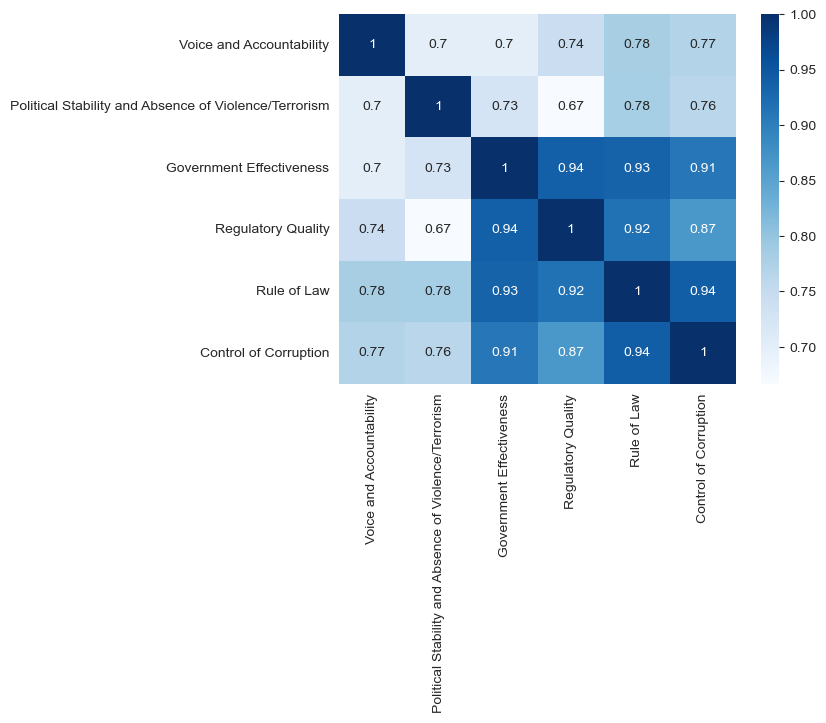

In [16]:
#correlation between the variables
WGI_corr = WGI.corr()
#vizualisation
seaborn.heatmap(WGI.corr(), annot = True, cmap = "Blues")

In [17]:
#PCA
!pip install sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [18]:
#keeping only numeric variables
WGI_numeric = WGI.drop(columns = ["Code","Country"])

In [19]:
pca = PCA()
pca.fit(WGI_numeric)

PCA()

In [20]:
#explained variance
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
eig = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(WGI_numeric.shape[1])], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

[5.04959218 0.41467898 0.30759716 0.12165034 0.04965011 0.04069217]
[0.84386857 0.06929957 0.05140446 0.02032974 0.00829734 0.00680032]


,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,5.049592,84.0,84.0
1,Dim2,0.414679,7.0,91.0
2,Dim3,0.307597,5.0,96.0
3,Dim4,0.121650,2.0,98.0
4,Dim5,0.049650,1.0,99.0
5,Dim6,0.040692,1.0,100.0


In [21]:
#Coordinates on the circle
pca.components_

array([[-0.37750239, -0.37087719, -0.42378854, -0.41732608, -0.43430217,
        -0.42138568],
       [ 0.48844396,  0.65583402, -0.37286018, -0.40542468, -0.13257594,
        -0.10165618],
       [-0.76537562,  0.60350415,  0.16241413, -0.12927521,  0.06087085,
         0.05645548],
       [-0.05176049, -0.23361868, -0.14986293, -0.55342169,  0.18333703,
         0.76183741],
       [-0.13050531, -0.02085703, -0.61015461,  0.17529628,  0.73828359,
        -0.18561589],
       [ 0.11577491, -0.11446349,  0.51014965, -0.5547552 ,  0.45980959,
        -0.44052629]])

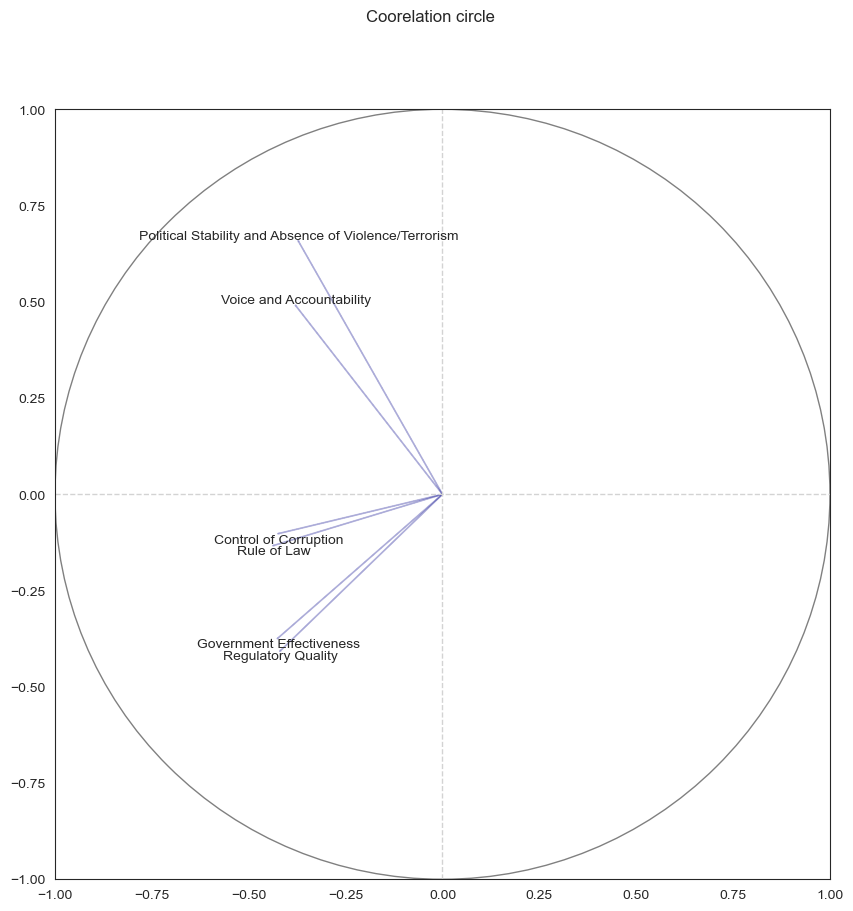

In [22]:
#Coorelation circle
# Creation of a empty figure (axes between -1 and 1 + the title)
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Coorelation circle")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Adding of axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Adding of variables names
for j in range(WGI_numeric.shape[1]):
    axes.arrow(0, 0, pca.components_[0, j], pca.components_[1, j], width = .001, color = "darkblue", alpha = .25)
    if (pca.components_[1, j] > 0):
        va = "bottom"
    else:
        va = "top"
    axes.text(pca.components_[0, j], pca.components_[1, j], WGI_numeric.columns.values[j], ha = "center", va = va)
# Adding of the circle
plt.gca().add_artist(plt.Circle((0,0), 1, color = 'gray', fill = False))

plt.show()

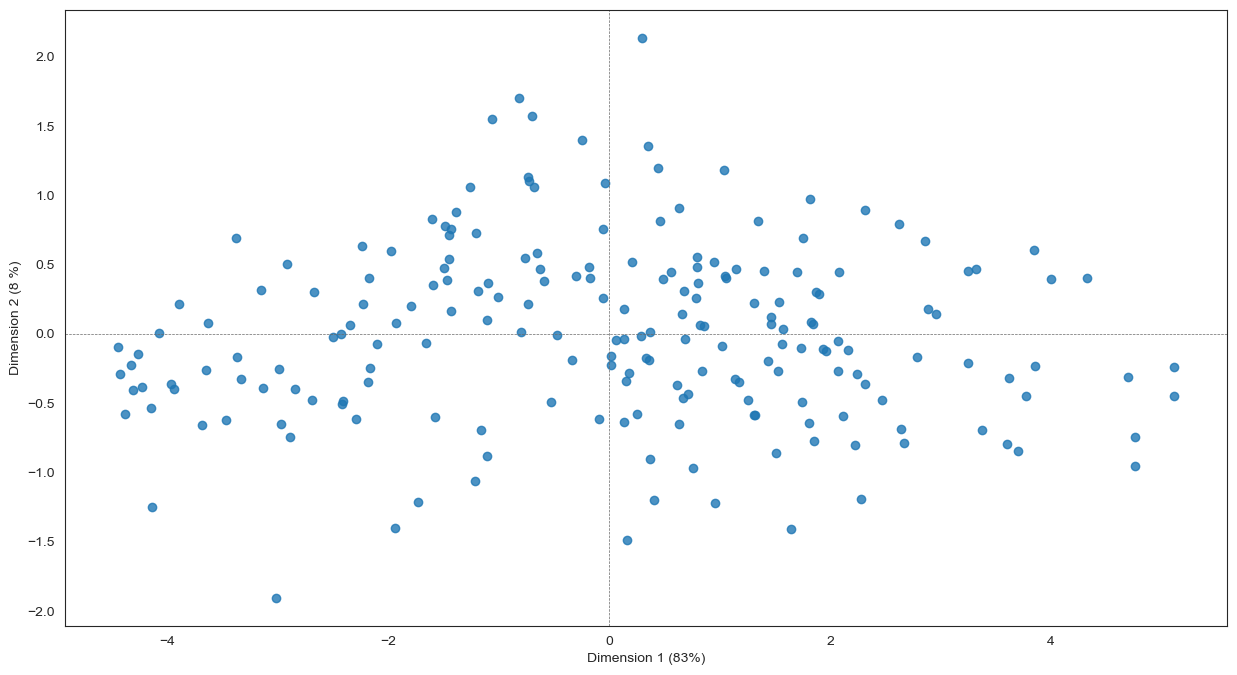

In [23]:
#Observations visualization
#observation coordinates
WGI_pca = pca.transform(WGI_numeric)
# Transformation as a DataFrame pandas
WGI_pca_df = pandas.DataFrame({
    "Dim1" : WGI_pca[:,0], 
    "Dim2" : WGI_pca[:,1],
    "Country" : WGI["Country"]
})
#graphic representation of the countries
plt.figure(figsize = (15, 8))
plt.axvline(x = 0, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 0, linewidth = .5, color = "dimgray", linestyle = "--")
seaborn.regplot(data = WGI_pca_df, x = "Dim1", y = "Dim2", fit_reg = False)
plt.xlabel("Dimension 1 (83%)") # modification of the name of the axe X
plt.ylabel("Dimension 2 (8 %)") # same for axe Y
plt.show()